In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
data = pd.read_csv('comparisons.csv').convert_dtypes()

In [21]:
data = data.assign(Score = lambda x: x['peak memory mb'] * x['total time min']).sort_values(['finished', 'rows', 'Score'], ascending=[False, False, True])
data

,method,rows,image size mb,peak memory mb,total time min,type,Handles rotating credentials?,platform,finished,Score,notes
0,pg_dump/pg_restore,41011955,145,34,3.0,EL,True,postgresql,True,102.0,This is purely EL job for postgresql. It need...
1,sling,41011955,145,55,6.0,EL,True,go,True,330.0,<NA>
2,pyspark_copy,41011955,1720,955,3.0,ETL,True,python,True,2865.0,<NA>
3,pyspark_write,41011955,1610,1075,4.5,ETL,True,python,True,4837.5,<NA>
4,duckdb_copy_parquet,41011955,566,3985,1.5,ETL,True,c,True,5977.5,Only sql
5,duckdb_copy,41011955,566,3148,2.0,ETL,True,c,True,6296.0,Only sql
6,spark_write,41011955,1330,2053,5.0,ETL,True,scala,True,10265.0,<NA>
7,polars_connectorx_copy,41011955,943,11330,5.0,ETL,True,python,True,56650.0,<NA>
8,polars adbc copy,41011955,841,11320,6.0,ETL,True,python,True,67920.0,<NA>
9,pg_dump/pg_restore,2000000,145,20,0.05,EL,True,postgresql,True,1.0,This is purely EL job for postgresql. It need...


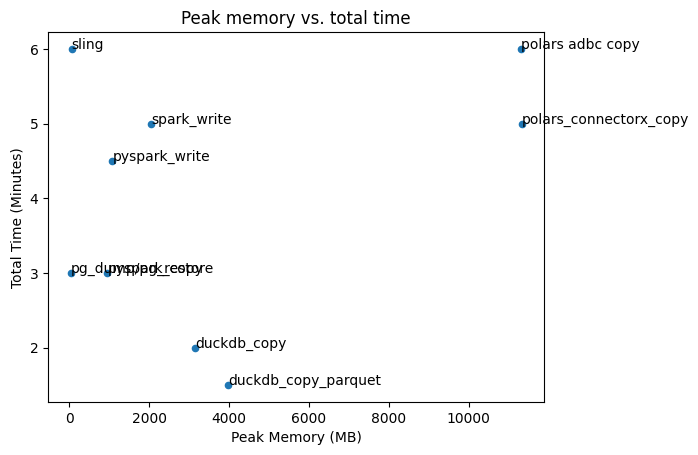

In [ ]:
# Filter the data
filtered_data = data[data['finished'] & (data['rows'] == 41011955)]

# Create the scatter plot
ax = filtered_data.plot(
    x='peak memory mb', 
    y='total time min', 
    kind='scatter', 
    title='Peak memory vs. total time'
)

# Add labels to each point
for i, row in filtered_data.iterrows():
    ax.text(row['peak memory mb'], row['total time min'], f"{row['method']}")

plt.xlabel('Peak Memory (MB)')
plt.ylabel('Total Time (Minutes)')
plt.show()